# Introducción

Este Notebook supone la primera prueba dentro de la entrevista técnica para el departamento de IA&Data de Capgemini de Marcos Crespo. En este primer enunciado se nos pide:

"Escoge un dataset abierto de clasificación que no sea el de Iris. 

En un Jupyter notebook tienes que hacer todo el análisis exploratorio, preprocesamiento, las visualizaciones que creas conveniente y pruebes los modelos que creas oportuno. Hecho esto eliges el modelo que mejor te haya resultado en función de las métricas que hayas elegido.

Con las conclusiones de este notebook tienes que crear los ficheros para producción. Es decir, los ficheros de Python que le pasarías a un DevOps para poner en producción."

Iremos desarrollando los diferentes puntos, explicando todos los puntos necesarios en cada apartado y comentando bien todas las decisiones.

# Datos

Los datos elegidos son el [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) dataset, unos datos ampliamente coocidos sobre el diagnostico de cáncer de mama recopilados y distribuidos por la **UC Irvine de California** en su [UCI MAchine Learning Repository](https://archive.ics.uci.edu/). Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria.  Describen características de los núcleos celulares presentes en la imagen. Este dataset es ampliamente utilizado para benchmarking en la literatura científica. Destaca que **no posee varaibles categóricas**, aunque con las para la mayoría de implementaciones de las técnicas de machine learning con `Sklearn`**no supone una diferencia** sustancial este hecho.

## Importación

En el portal oficial de los datos se nos sugiere una forma alternativa de importación de los datos a traves del repositorio de la universidad que no requiere la descarga de los ficheros, y elegimos usarla ya que facilita la simplicidad y reproducibilidad del documento al no tener que adjuntar el fichero. Procedemos a importar los datos


In [19]:
from ucimlrepo import fetch_ucirepo
  
# cargamos dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# almacenamos (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

## Análisis Exploratorio de los Datos

Ahora podemos echar un vistazo rápido a las características de los datos. El tamaño del conjunto y algunas características de las variables son:

In [2]:
import pandas as pd

print('Los datos tienen ',X.shape[0], ' observaciones y ', X.shape[1], ' variables. La respuesta tiene ', y.shape, ' entradas \n')

# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

Los datos tienen  569  observaciones y  30  variables. La respuesta tiene  (569, 1)  entradas 

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous  

En la tabla anterior podemos ver la información principal de las 30 variables. Lo primero que tenemos que explicar es que, aparte del ID y la respuesta, las variables explicativas son **3 conjuntos (1,2,3) de las 10 mismas características observadas para 3 momentos a lo largo de la biopsia**. En la documentación oficial del dataset encontramos que se tratan de características de los núcleos celulares derivadas de una imagen digitalizada. Estas características son: Promedio (1), Desviacion Estándar (2), Peor momento(3). Os remitimos al sitio web oficial del dataset para una explicación detallada de cada variable. Brevemente:

	a) radio (media de las distancias del centro a los puntos del perímetro)
	b) textura (desviación típica de los valores de la escala de grises)
	c) perímetro
	d) área
	e) suavidad (variación local de las longitudes de los radios)
	f) compacidad (perímetro^2 / área - 1,0)
	g) concavidad (gravedad de las partes cóncavas del contorno)
	h) puntos cóncavos (número de porciones cóncavas del contorno)
	i) simetría 
	j) dimensión fractal

Por otro lado, obervamos que al ser este dataset tan reconocido por la comunidad, la calidad del dato es muy alta y no tenemos problemas en cuanto a la estrucura o **Missing Values (NA's)**. Queremos denotar que **conocemos y hemos aplicado multitud de veces las diferentes técnicas que existen para el manejo de NA's** (imputación por KNN, imputacion a la media, etc) y simplemente en este set no hace falta.

Ahora podemos ver los principales **estadísticos descriptivos** de las varaibles. Observamos como los radius, texture, perimeter y area tienen magnitudes muy diferentes a smoothness, compactness, concavity, symmetry y fractal_dimension. 

In [3]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Vamos a realizar algunas **visualizaciones** para extraer información sobre posibles prepocesaminetos para los datos y alguna información adicional. 

En primer lugar observamos la distribución de la variable respuesta. Observamos como los tumores malignos (M) y los benignos (B) están bien distribuidos no habiendo una clase dramáticamente menos representada.

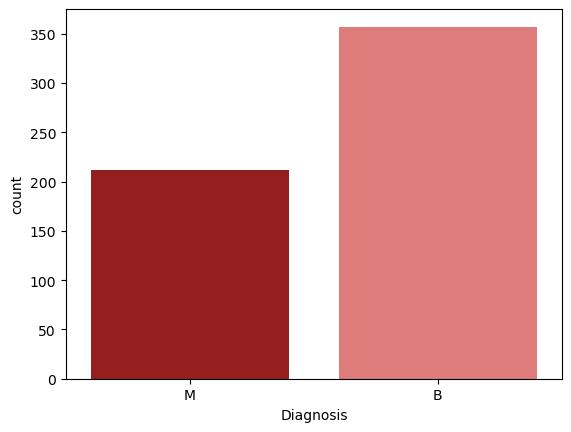

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
sns.countplot(x='Diagnosis', data=y, palette=['#A80C0C','#EF6A6A'])
plt.show()

Ahora intentamos un gráfico algo mas avanzado para ver las **distribuciones de cada variable** dependiendo del grupo (1,3) al que pertenecen. Observamos como el grupo 2, que representa el SE (sqrt(varianza)) queda representado en otra figura separada. 

En un primer vistazo se puede observar como todas las variables en el grupo 3 tienden a estar mas a la derecha, indicando esto el tamaño y gravedad del tumor. Por otro lado, se podría intentar corregir el **'skewness'** de algunas variables como *concavity* o *compactness*, pero no es muy severo.

En el gráfico naranja se puede observar como la varianza a lo largo de cada biopsia concuerda con las maginitudes de los datos y ningun dato llama la atención.

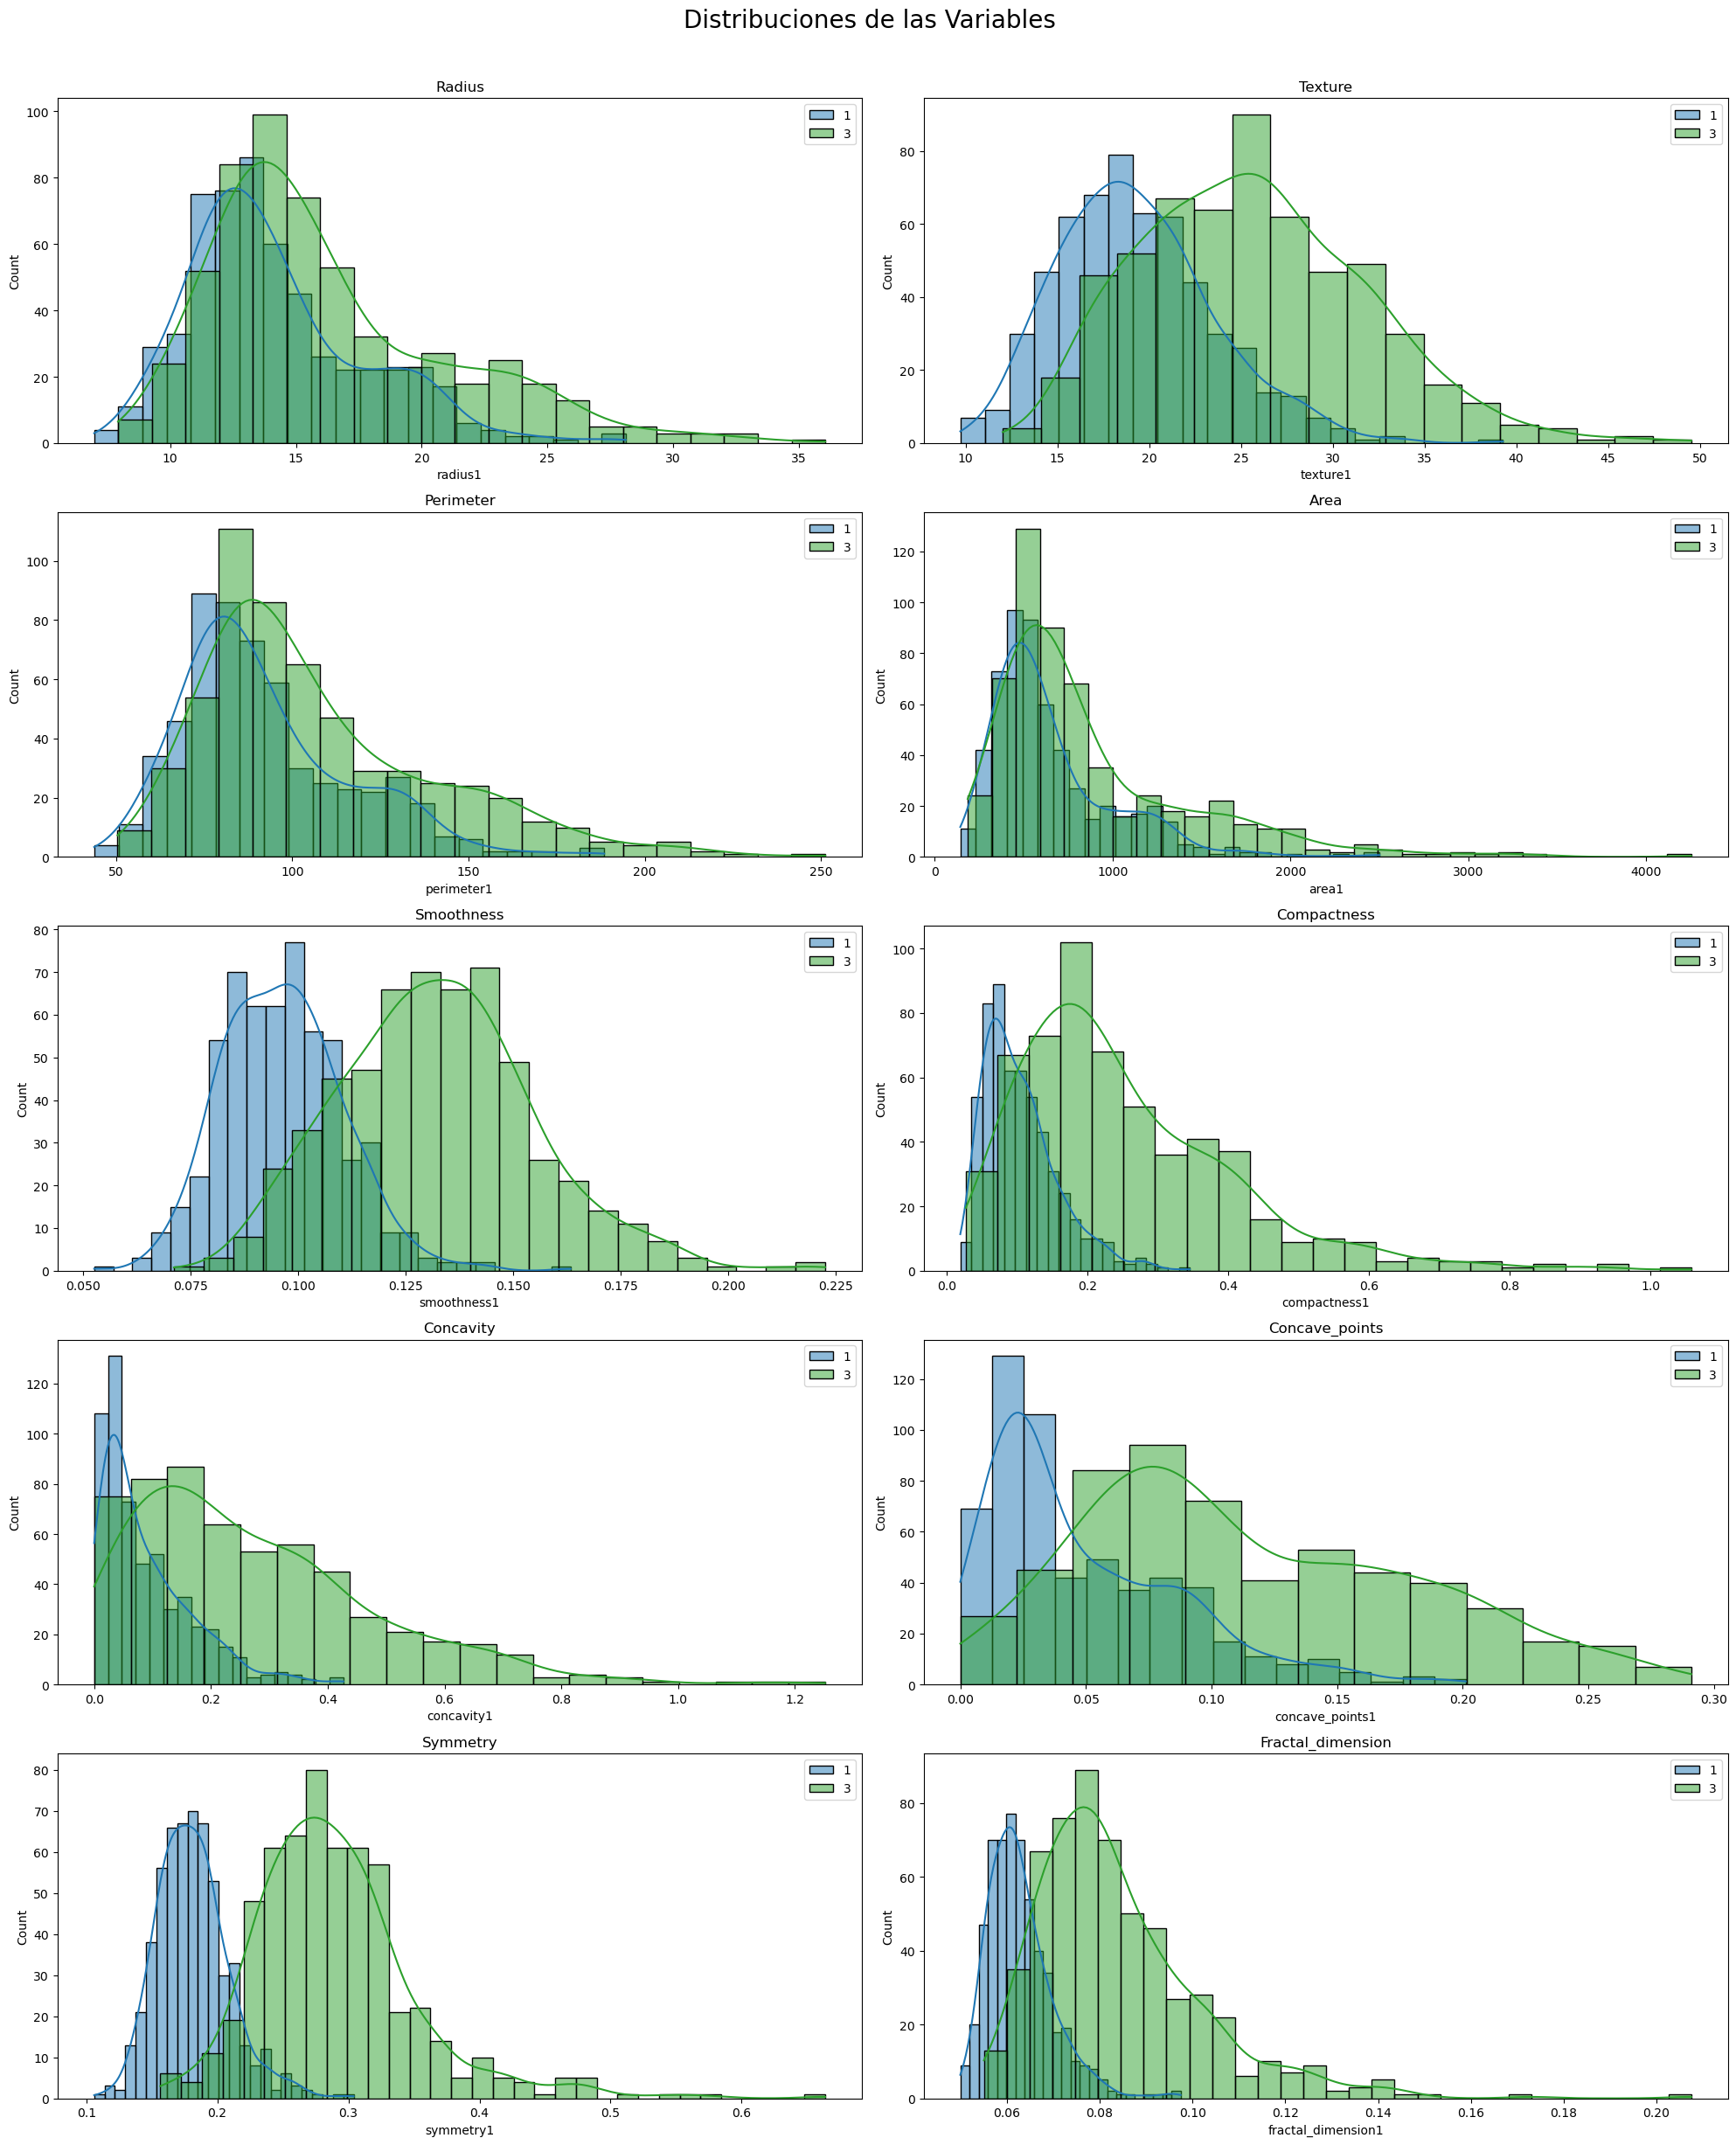

In [5]:
# Listas de las variables agrupadas
variables = ["radius", "texture", "perimeter", "area", "smoothness", 
             "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]

# Configuración de los gráficos
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.suptitle('Distribuciones de las Variables', fontsize=20)

# Colores para los diferentes grupos
colors = ['#1f77b4','#2ca02c']
groups = ['1', '3']

# Iterar sobre las variables y ejes
for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Plot para cada grupo
    for group, color in zip(groups, colors):
        sns.histplot(X[f'{var}{group}'], kde=True, color=color, label=group, ax=ax)
    
    ax.set_title(var.capitalize())
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


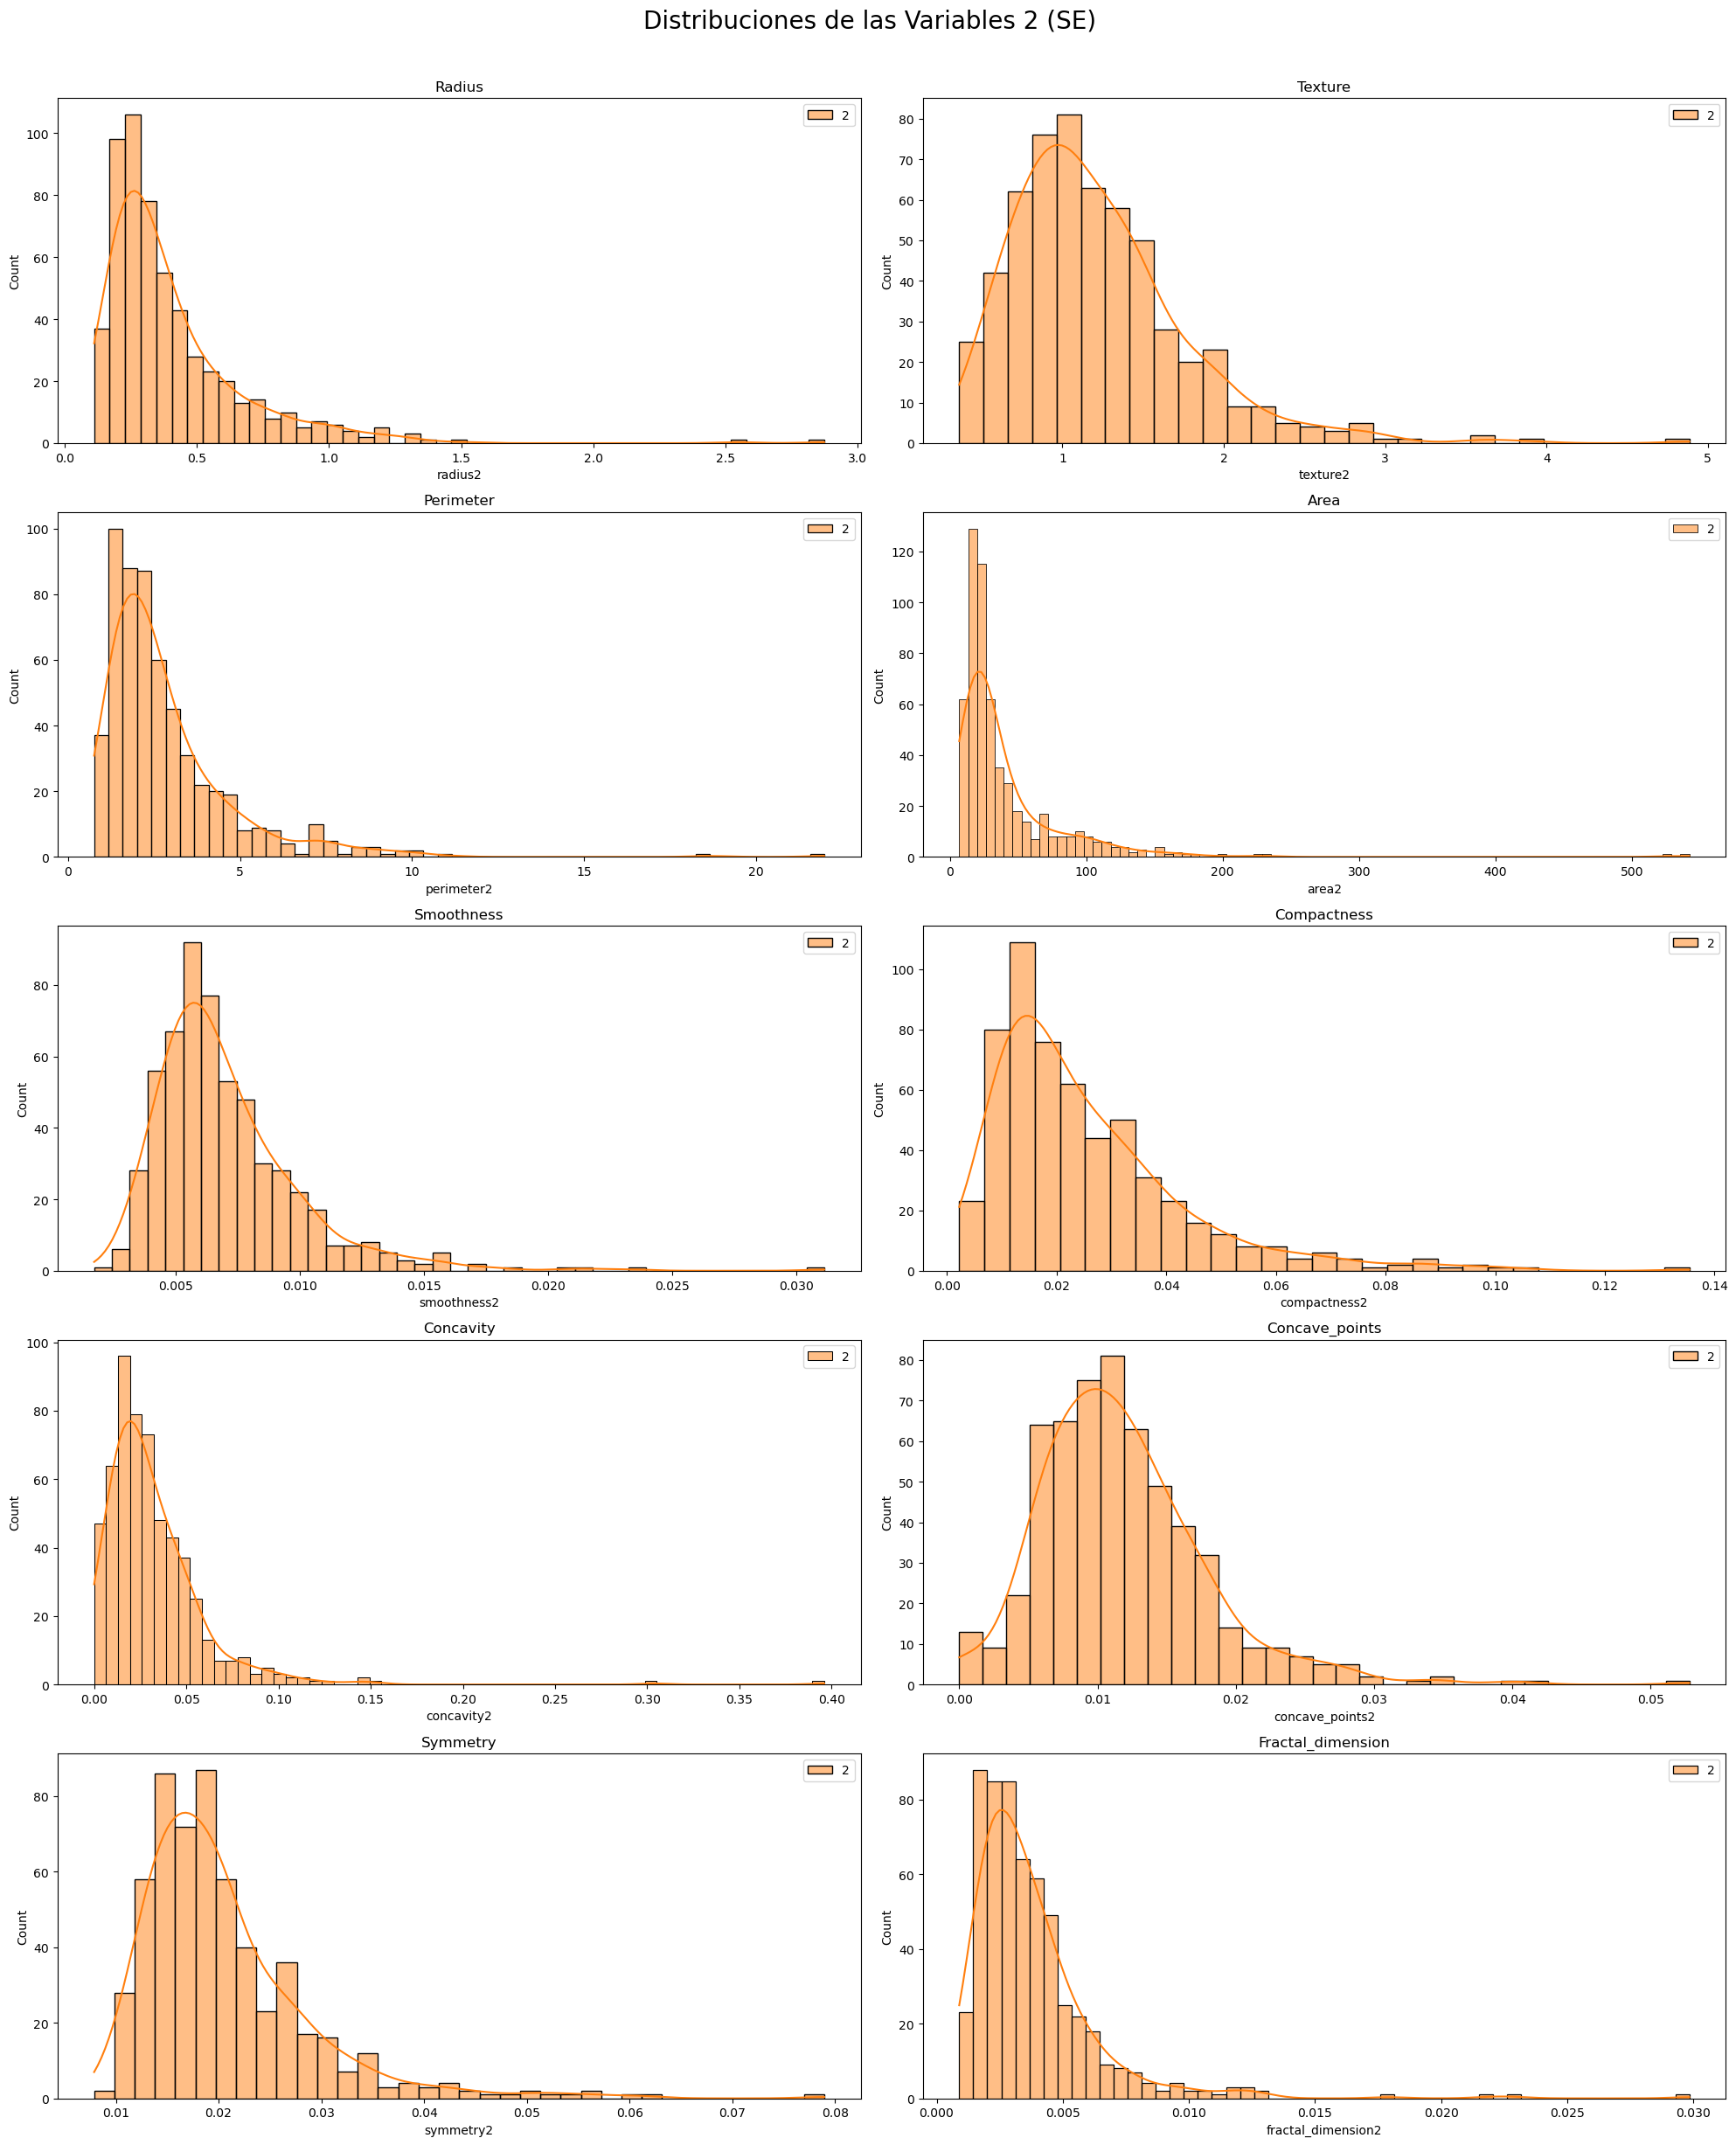

In [6]:
# Configuración de los gráficos para "se"
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.suptitle('Distribuciones de las Variables 2 (SE)', fontsize=20)

# Color para el grupo "se"
color = '#ff7f0e'
group = '2'

# Iterar sobre las variables y ejes
for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Plot para el grupo "se"
    sns.histplot(X[f'{var}{group}'], kde=True, color=color, label=group, ax=ax)
    
    ax.set_title(var.capitalize())
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Detección de outliers

Ahora procedemos con una inspección visual con boxplots para detectar outliers.

**Nota**: Queremos denotar cómo en este caso particular pensamos que en este dataset el análisis de outliers no tiene mucho sentido más allá de eliminar observaciones con errores de medición. En medicina, y más aún en este ejemplo concreto, outliers de magnitud podrían tener sentido si algún tumor está muy desarrollado (más aún teniendo en cuenta lo conmensurado de las magnitudes de los datos). Esta sección queda dispuesta más a modo de demostración del proceso.

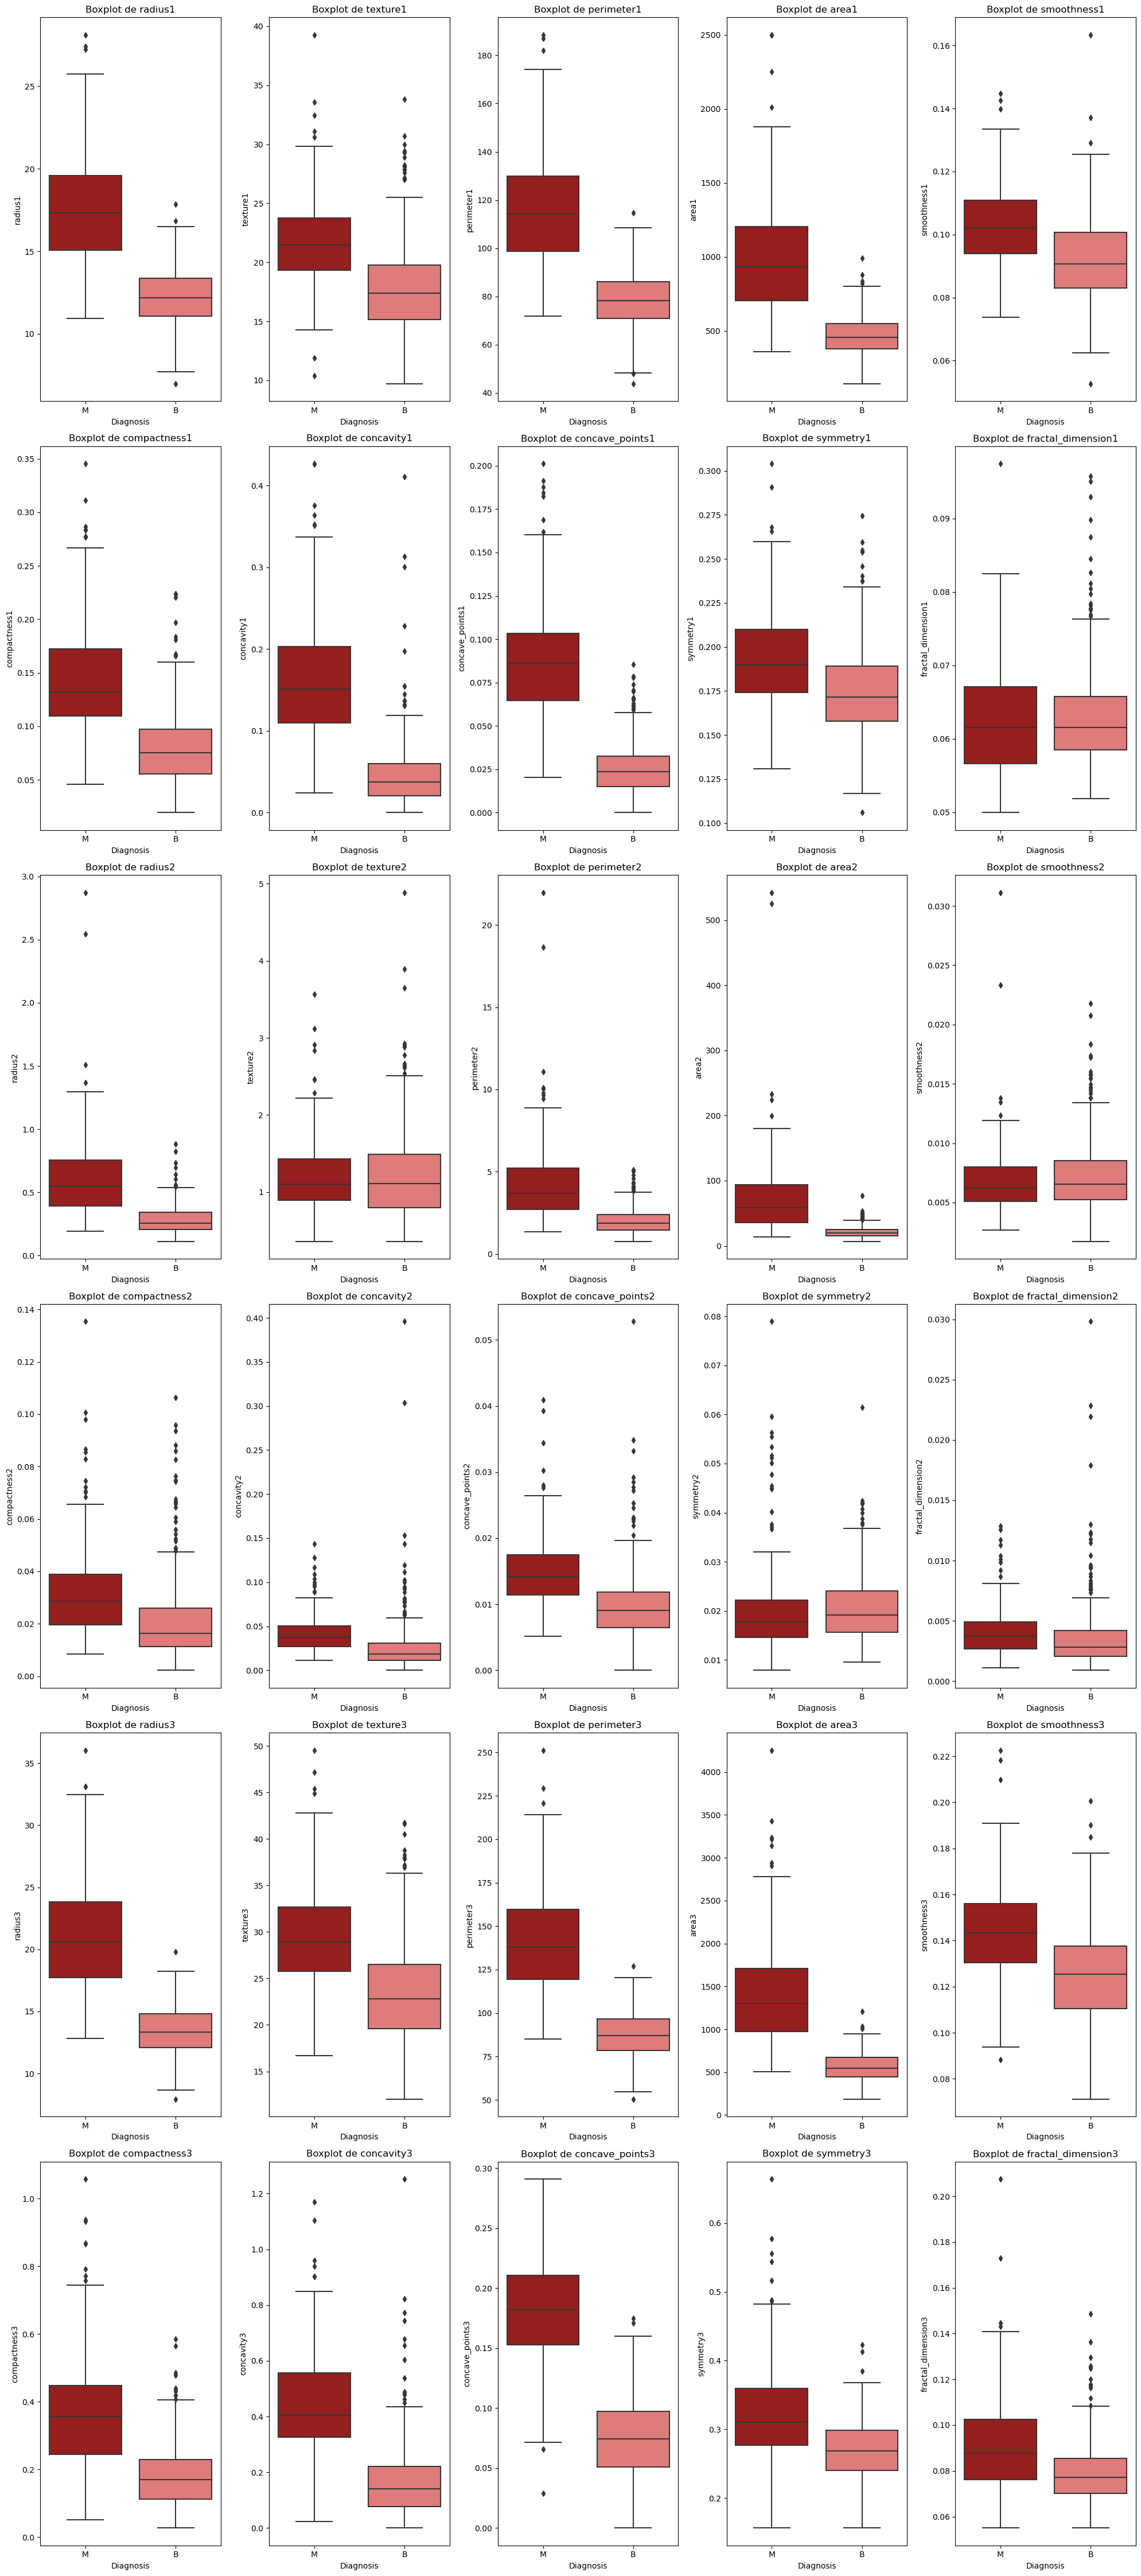

In [21]:
# Obtener la lista de características
features1 = X.columns  # Excluir la columna 'Diagnosis'

# Crear boxplots para cada grupo
plt.figure(figsize=(20, 45))
for i, feature in enumerate(features1):
    plt.subplot(6, 5, i + 1)  # Ajustar la disposición de los subplots
    sns.boxplot(x=y['Diagnosis'], y=feature, data=X, palette=['#A80C0C','#EF6A6A'])
    plt.title(f'Boxplot de {feature}')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Después de este análisis podemos aspirar a eliminar algunas de las observaciones como outliers. Aún así, queremos denotar la moderación en las magnitudes de las observaciones. Es por eso que vamos a hacer un **análisis de rango intercunatílico** muy suave, viendo qué observaciones superan 3 Veces el rango entre el **cuantil 0.025 y 0.975**.

In [10]:
import numpy as np

# Calcular el rango intercuartílico (IQR) para cada característica
Q1 = X.quantile(0.025)
Q3 = X.quantile(0.975)
IQR = Q3 - Q1

# Calcular límites para detección de outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Detectar outliers para cada característica
outliers = ((X < lower_bound) | (X > upper_bound)).any(axis=1)

# Mostrar las observaciones que son outliers
print("Observaciones identificadas como outliers:")
print(outliers[outliers==True])


Observaciones identificadas como outliers:
152    True
461    True
dtype: bool


Marcamos como observaciones extremas la observación 152 y la observación 461. Procederemos más adelante a su eliminación.

--------

Por último, a modo de justificación para la elaboración de modelos, echamos un vistazo a la **correlación entre variables**. Observamos como existen varias zonas de la matriz de correlación (esquinas) en las que existe una fuerte correlación así como alguna correlación con las varaibles de varianza, luego podemos asegurar que existe relación entre las variables y que hay una motivación para intentar encontrar un modela que nos sirva para predecir la gravedad de los tumores.

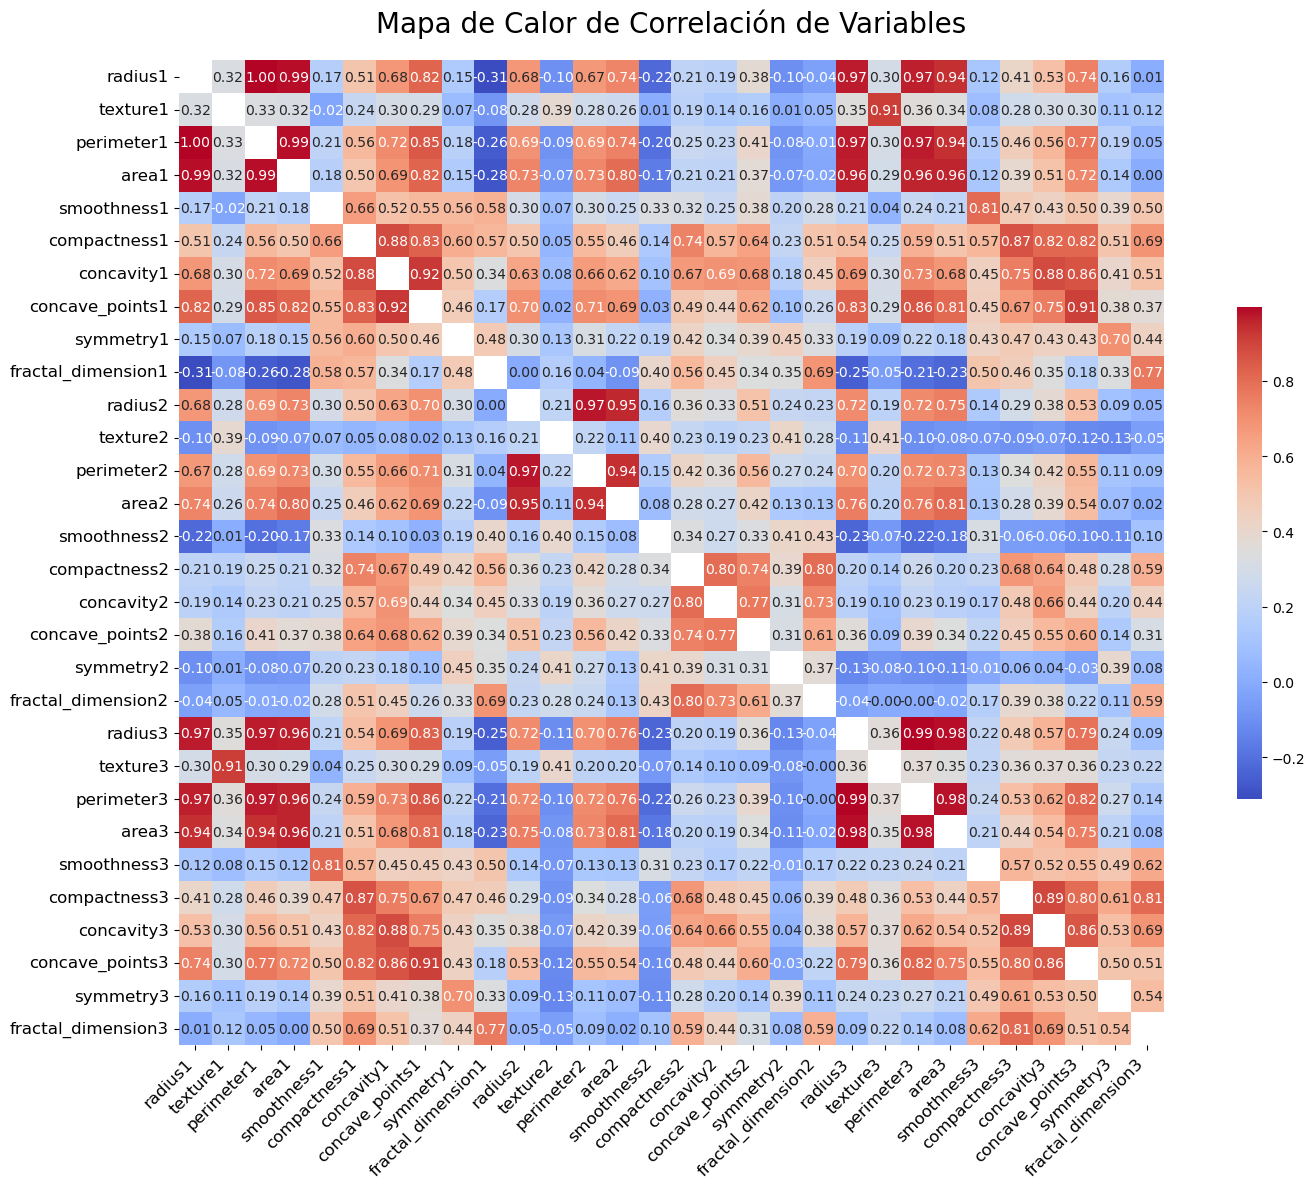

In [11]:
import numpy as np

# Calcular la matriz de correlación
corr_matrix = X.corr()

# Eliminar los 1 de la diagonal principal
np.fill_diagonal(corr_matrix.values, np.nan)

# Tamaño de la figura
plt.figure(figsize=(16, 12))

# Crear el heatmap
heatmap = sns.heatmap(corr_matrix, 
                      annot=True, 
                      fmt='.2f', 
                      cmap='coolwarm', 
                      linewidths=0, 
                      linecolor='black', 
                      cbar_kws={'shrink': 0.5}, 
                      square=True)

# Títulos y etiquetas
plt.title('Mapa de Calor de Correlación de Variables', fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el heatmap
plt.show()


## Preprocesamiento de los datos

Vamos a realizar algunas labores de preprocesamiento de los datos. En primer lugar, en la variable respuesta se van a sustituri los valores de **'M' (Maligno) y 'B' (Benigno) por 1 y 0** para la correcta clasificación binaria. Utilizamos el Maligno como 1 ya que será la variable de interés para evaluar la eficacia de los modelos. 

Además, realizamos la separación en datos de train y test con un porcentaje de $80\%$ y $20\%$ posterior a la eliminación de los puntos clasificados como outliers.

Por último, cuando las variables numéricas tienen tan diversas magnitudes, suele ser recomendable aplicar un **normalizado**, es decir escalarlas y centrarlas. Aplicaremos esto directamente en el **pipeline de los datos** para evitar el Data Leakage, pero pertenece al preprocesado de datos.

In [15]:
import warnings

# Suprimir advertencias en este bloque de código
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Eliminar outliers
X=X.drop([152, 461])
y= y.drop([152,461])

# Convertir 'Diagnosis' a numérico
y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})

# Hacemos un array 1D para Sklearn
y=np.ravel(y)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Clasificación

Probamos ahora con diferentes modelos de clasificación binaria, todos ellos bajo el framework de **Pipelines** de datos que nos proporciona la librería **Sklearn**. Daremos una explicación de la metodología usada para el ajuste de cada modelo, si bien no entraremos en la explicación del mimso pues no es el objetivo del documento. 

**Nota**: La **métrica** elegida para comprar modelos va a ser el **Recall**. En medicina oncológica es muy común querer minimizar los falsos negativos, pues se entiende que es mas grave no diagnosticar un cancer que diagnositcar falsamente a menos en un primer diagnóstico por imágen, como es el caso. Cuando el objetivo de una tarea de predicción es minimizar los falsos negativos, el recall es una métrica de evaluación adecuada. El Recall mide la proporción de verdaderos positivos identificados correctamente por el modelo. Aún así, mostraremos otras métricas interesantes para cada modelo.

## Regresión Logística

En primer lugar probaremos uno de los modelos más básicos de clasificación, la [regresión logística](https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica). En regresión logística, no es necesario el ajuste de ningún hiperparámetro, y el 'solver' numérico por defecto nos sirve por nuestra muestra pequeña. Es por esto que no realizamos ninguna validación cruzada


Recall: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        68
           1       0.98      0.96      0.97        46

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



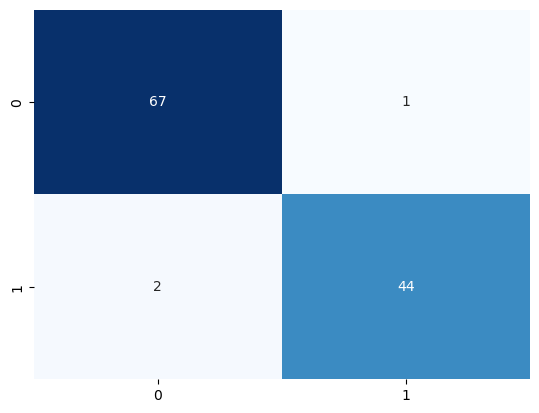

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, confusion_matrix, classification_report


# Creamoss un pipeline
pipeline_LR = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

# Ajustamos el modelo
pipeline_LR.fit(X_train,y_train)

# Predecciones del modelo
y_pred_LR = pipeline_LR.predict(X_test)

# Evaluación del Recall
recall_LR = recall_score(y_test, y_pred_LR)
print(f'Recall: {recall_LR:.2f}')

# Matriz de Confusión gráfico
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues', cbar=False)

# Reporte de otras métricas
class_report_LR = classification_report(y_test, y_pred_LR)
print('Classification Report:')
print(class_report_LR)

Un enfoque muy típico de la regresión logística es modificar el cutoff probabilístico que el modelo emplea para asignar la categoría a cada observación. A continuación se explica cómo hacer esto, aunque no aplique a nuestro caso. La optimización del Recall en estos datos, el Recall tiende a 1 mientras el cutoff lo hace a 0 y no es un enfoque realista. Para otros casos en los que no se pretenda maximizar el Recall este enfoque junto con una Curva ROC sirven para encontrar el punto de cutoff óptimo.

In [51]:
# Obtener las probabilidades predichas
y_prob = pipeline_LR.predict_proba(X_test)[:, 1]  # Probabilidad de pertenecer a la clase 1

# Aplicar un cutoff personalizado (ejemplo: 0.3)
cutoff = 0.01
y_pred_custom_cutoff = (y_prob >= cutoff).astype(int)

# Evaluar el rendimiento con el nuevo cutoff
recall_custom_cutoff = recall_score(y_test, y_pred_custom_cutoff)
print(f'Recall con cutoff {cutoff}: {recall_custom_cutoff:.2f}')


Recall con cutoff 0.01: 0.98


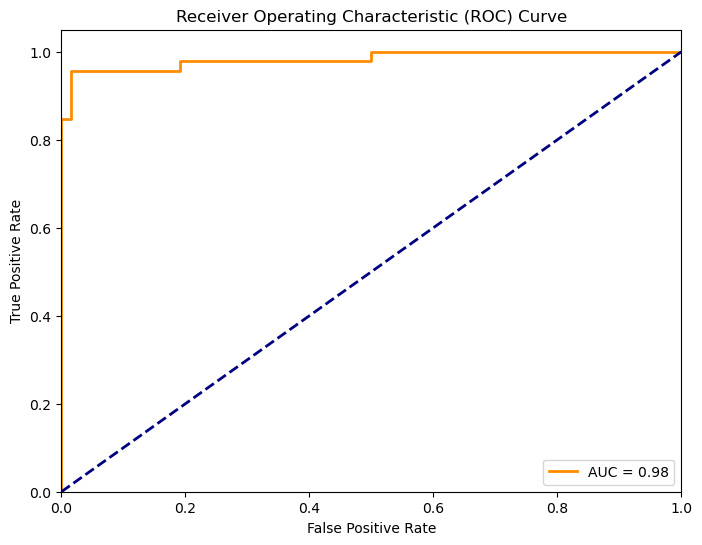

AUC: 0.98
Mejor Cutoff según el índice de Youden: 0.66


In [52]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Encontrar el índice de Youden
j_scores = tpr - fpr
best_threshold_idx = np.argmax(j_scores)
best_threshold = thresholds[best_threshold_idx]

# Mostrar resultados
print(f"AUC: {roc_auc:.2f}")
print(f"Mejor Cutoff según el índice de Youden: {best_threshold:.2f}")


## KNN Classification

El algoritmo de KNN es un algoritmo de análisis clúster muy conocido. Se puede modificar para aplicarlo a clasificación binaria y esta modificación está implementada en `Sklearn`. En este caso hay 2 parámetros principales que si debemos ajustar, siendo el `número de vecinos` que el modelo tiene en cuenta para asignar la clase, y la `función de distancia` que utliza para ello. Por ello utlizamos un enfoque de GridSearch con valores posibles para encontrar la mejor combinación. Se seleccionará maximizando el Recall de la media en un 5-Fold CV.

Best Parameters:
{'KNN_class__metric': 'euclidean', 'KNN_class__n_neighbors': 3}
Recall: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        68
           1       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



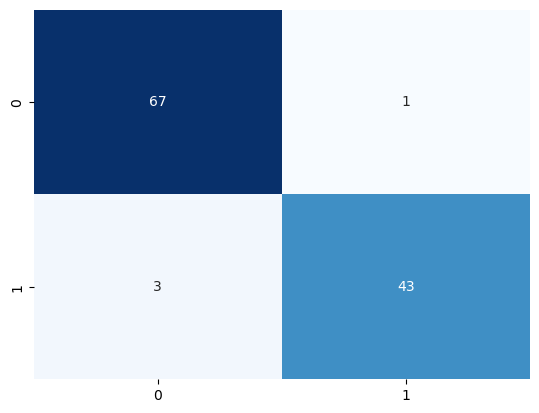

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Creamos el pipeline
pipeline_KNN = Pipeline([
    ('scaler', StandardScaler()),
    ('KNN_class', KNeighborsClassifier())
])

# Definimos el Grid
param_grid = {
    'KNN_class__n_neighbors': [3, 5, 7, 9],
    'KNN_class__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Iniciamos GridSearchCV
grid_search = GridSearchCV(pipeline_KNN, param_grid, cv=5, scoring='recall')

# Ajustamos el modelo
grid_search.fit(X_train, y_train)

# Mostramos los parametros finales elegidos
print('Best Parameters:')
print(grid_search.best_params_)

# Predicciones del mejor modelo
y_pred_KNN = grid_search.best_estimator_.predict(X_test)

# Evaluacion en Recall
recall_KNN = recall_score(y_test, y_pred_KNN)
print(f'Recall: {recall_KNN:.2f}')

# Matriz de Confusión gráfico
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues', cbar=False)

# Reporte de otras métricas
class_report_KNN = classification_report(y_test, y_pred_KNN)
print('Classification Report:')
print(class_report_KNN)


## Support Vector Machines Classification

Los Support Vector Machines (SVM) son modelos de aprendizaje supervisado utilizados para la clasificación y regresión, que buscan encontrar el hiperplano óptimo que maximiza el margen entre clases. Los parámetros sujetos a hyperparameter tuning incluyen el `kernel` (lineal, polinomial, RBF), el parámetro de `regularización C`, y el parámetro `gamma` para kernels no lineales. Seguimos el mismo enfoque que con los KNN Classifiers.

Best Parameters:
{'SVM_class__C': 10, 'SVM_class__gamma': 'scale', 'SVM_class__kernel': 'rbf'}
Recall: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.94      0.96      0.95        46

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



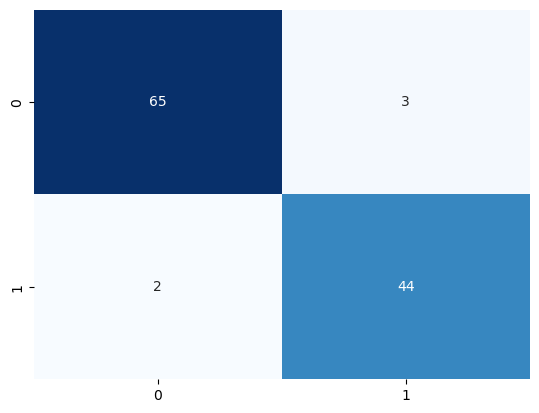

In [56]:
from sklearn.svm import SVC

# Creamos el pipeline
pipeline_SVM = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM_class', SVC())
])

# Definimos el Grid
param_grid = {
    'SVM_class__C': [0.1, 1, 10, 100],
    'SVM_class__kernel': ['linear', 'rbf', 'poly'],
    'SVM_class__gamma': ['scale', 'auto']
}

# Inicializamos GridSearchCV
grid_search = GridSearchCV(pipeline_SVM, param_grid, cv=5, scoring='recall')

# Ajustamos el modelo
grid_search.fit(X_train, y_train)

# Mostramos los parámetros finales
print('Best Parameters:')
print(grid_search.best_params_)

# Predicciones con el mejor modelo
y_pred_SVM = grid_search.best_estimator_.predict(X_test)

# Evaluamos el Recall
recall_SVM = recall_score(y_test, y_pred_SVM)
print(f'Recall: {recall_SVM:.2f}')

# Matriz de Confusión gráfico
conf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Blues', cbar=False)

# Reporte de otras métricas
class_report_SVM = classification_report(y_test, y_pred_SVM)
print('Classification Report:')
print(class_report_SVM)


## Random Forests

Los Random Forests son modelos basados en ensambles de árboles de decisión, donde múltiples árboles se construyen durante el entrenamiento y la predicción se hace promediando las predicciones de cada uno de ellos. Los parámetros sujetos a hyperparameter tuning incluyen el número de árboles (`n_estimators`), la profundidad máxima de cada árbol (`max_depth`), el número mínimo de muestras requeridas para dividir un nodo (`min_samples_split`), y la cantidad mínima de muestras requeridas en cada hoja del árbol (`min_samples_leaf`).

Best Parameters:
{'RF_class__max_depth': None, 'RF_class__min_samples_leaf': 1, 'RF_class__min_samples_split': 2, 'RF_class__n_estimators': 100}
Recall: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        68
           1       0.93      0.91      0.92        46

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



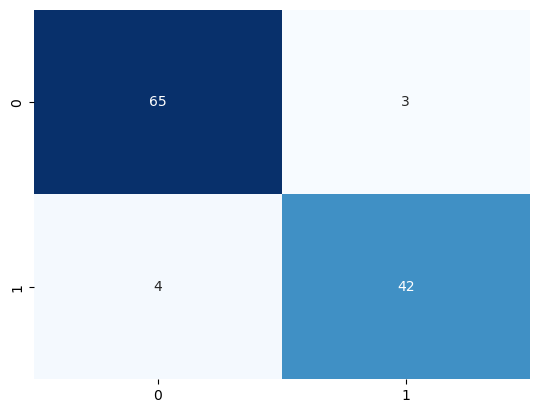

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el pipeline
pipeline_RF = Pipeline([
    ('scaler', StandardScaler()),
    ('RF_class', RandomForestClassifier(random_state=42))
])

# Definimos el grid
param_grid = {
    'RF_class__n_estimators': [50, 100, 150],
    'RF_class__max_depth': [None, 10, 20, 30],
    'RF_class__min_samples_split': [2, 5, 10],
    'RF_class__min_samples_leaf': [1, 2, 4]
}

# Inicializamos el GridSearchCV
grid_search = GridSearchCV(pipeline_RF, param_grid, cv=5, scoring='recall')

# Ajustamos el modelo
grid_search.fit(X_train, y_train)

# Mostramos los parámetros finales
print('Best Parameters:')
print(grid_search.best_params_)

# Predicciones con el mejor modelo
y_pred_RF = grid_search.best_estimator_.predict(X_test)

# Evaluacion en Recall
recall_RF = recall_score(y_test, y_pred_RF)
print(f'Recall: {recall_RF:.2f}')

# Matriz de Confusión gráfico
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues', cbar=False)

# Reporte de otras métricas
class_report_RF = classification_report(y_test, y_pred_RF)
print('Classification Report:')
print(class_report_RF)


## Neural Networks

Las redes neuronales MLP (Multi-Layer Perceptron) son modelos de aprendizaje profundo que consisten en múltiples capas de neuronas interconectadas, utilizadas para tareas de clasificación y regresión.

Los parámetros sujetos a hyperparameter tuning en MLP incluyen el `número de capas ocultas` y `el número de neuronas` por capa, la `función de activación` de las capas ocultas y de salida, la `tasa de aprendizaje`, entre otras.

Best Parameters:
{'NN_class__activation': 'tanh', 'NN_class__alpha': 0.0001, 'NN_class__hidden_layer_sizes': (4,), 'NN_class__learning_rate': 'constant'}
Recall: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.96      0.96      0.96        46

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



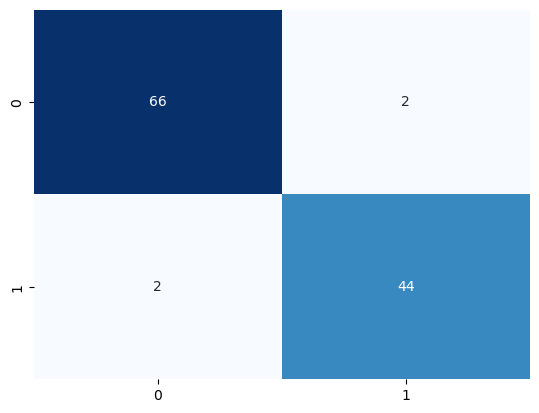

In [59]:
from sklearn.neural_network import MLPClassifier

# Creamos el pipeline
pipeline_NN = Pipeline([
    ('scaler', StandardScaler()),
    ('NN_class', MLPClassifier(random_state=42, max_iter=10000))
])

# Definimos el Grid
param_grid = {
    'NN_class__hidden_layer_sizes': [(2,),(3,),(3,2),(4,),(4,2),(4,3)],
    'NN_class__activation': ['logistic', 'tanh'],
    'NN_class__alpha': [0.0001, 0.001, 0.01],
    'NN_class__learning_rate': ['constant', 'adaptive']
}

# Inicializamos el GridSearch
grid_search = GridSearchCV(pipeline_NN, param_grid, cv=5, scoring='recall')

# Ajustamos el modelo
grid_search.fit(X_train, y_train)

# Mostramos los parámetros finales
print('Best Parameters:')
print(grid_search.best_params_)

# Predicciones con el mejor modelo
y_pred_NN = grid_search.best_estimator_.predict(X_test)

# Evaluacion en Recall
recall_NN = recall_score(y_test, y_pred_NN)
print(f'Recall: {recall_NN:.2f}')

# Matriz de Confusión gráfico
conf_matrix_NN = confusion_matrix(y_test, y_pred_NN)
sns.heatmap(conf_matrix_NN, annot=True, fmt='d', cmap='Blues', cbar=False)

# Reporte de otras métricas
class_report_NN = classification_report(y_test, y_pred_NN)
print('Classification Report:')
print(class_report_NN)

# Resultados

Pasamos a comprobar qué modelo nos ha dado mejores resultados con un simple gráfico de barras. Queremos denotar como ha habido un tope en un Recall de 0.96. Quizás los modelos podrían haber mejorado usando otra métrica pero con esta premisa habia siempre 3/4 observaciones de muy dificil clasificación. 

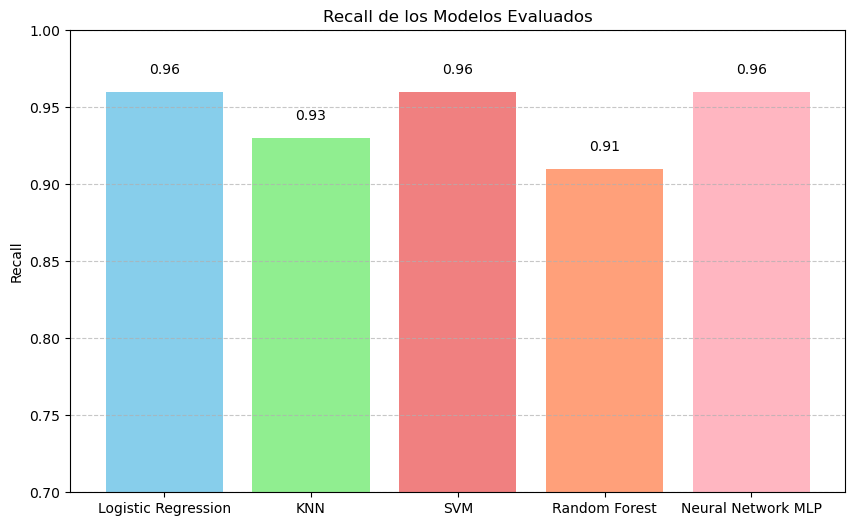

In [61]:
import matplotlib.pyplot as plt

# Definir los nombres de los modelos y sus respectivos recalls
modelos = ['Logistic Regression',  'KNN','SVM', 'Random Forest', 'Neural Network MLP']
recalls = [0.96, 0.93, 0.96, 0.91, 0.96]  # Ejemplo: reemplaza con tus valores reales

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, recalls, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.ylabel('Recall')
plt.title('Recall de los Modelos Evaluados')
plt.ylim(0.7, 1.0)  # Ajusta el rango del eje y si es necesario
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de las barras
for i, recall in enumerate(recalls):
    plt.text(i, recall + 0.01, f'{recall:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()


## Creación de modelos de producción

Elegimos como **mejor modelo el Logistic Regression**, ya que a igualdad de Recall, siempre es mejor coger el modelo más sencillo y rápido. Para la creación de los archivos en producción haremos lo siguiente.

### Guardamos el modelo

Procedemos a guardar el modelo en un fichero

In [62]:
import joblib
from sklearn.pipeline import Pipeline

# Suponiendo que tu pipeline se llama pipeline_LR
# Guarda el pipeline completo (incluye scaler y modelo)
joblib.dump(pipeline_LR, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

## Fichero de ejecución del modelo

Hemos creado un fichero para que un posible DevOps ejecute el modelo si tuviera un fichero .csv con datos para predecir. El fichero comprueba la calidad del dato (no comprueba NA's porque el modelo los soporta, aunque afectará a la calidad de la predicción) en términos de tipo de dato. Finalmente produce un archivo .csv con las predicciones del modelo. 

## Creamos archivo de requisitos

Creamos un archivo de requisitos para la reproducibilidad del modelo. Todas las librerias utilizadas son muy conocidas y tienen un mantenimineto continuo, por lo que no debería haber ningun problema de incompatibilidad de versiones, pero si lo hubiera esta es la manera de solucionarlo. En el fichero adjunto README.txt se explica como instalar los requisitos.

## Documentación

Finalmente creamos un archivo README.txt para que el DevOps pueda ejercer la predicción sin necesidad de leer todo este documento. Alli se explican los pasos de como generar el fichero de predicciones.


In [64]:
# Crear un DataFrame de ejemplo con 6 observaciones y 30 columnas
data = np.random.rand(6, 30)  # Genera valores aleatorios entre 0 y 1
df = pd.DataFrame(data, columns=[f'feature_{i}' for i in range(1, 31)])

# Guardar el DataFrame como un archivo CSV
df.to_csv('example_input.csv', index=False)

print('Archivo example_input.csv creado.')


Archivo example_input.csv creado.
